In [1]:
import math

TFR = 3.019  # Population-weigthed average
MEAN_CHILDBEARING_AGE = 27.83 # Population-weigthed average
POPULATION_2023 = 8_000_000_000
POPULATION_1974 = 4_000_000_000
NUMBER_OF_YEARS = 49  # 1974-2023

population = POPULATION_1974

growth_rate = math.log(TFR / 2) / MEAN_CHILDBEARING_AGE
population *= (1 + growth_rate) ** NUMBER_OF_YEARS

print(f"Years: {NUMBER_OF_YEARS}")
print(f"Growth rate: {growth_rate:,.4f}")
print(f"Population: {population:,.0f}")

Years: 49
Growth rate: 0.0148
Population: 8,215,290,834


## Confirming the Equation with Euler’s Number

In [2]:
import math

TFR = 3.019  # Population-weigthed average
MEAN_CHILDBEARING_AGE = 27.83 # Population-weigthed average
POPULATION_2023 = 8_000_000_000
POPULATION_1974 = 4_000_000_000
NUMBER_OF_YEARS = 49  # 1974-2023

population = POPULATION_1974

growth_rate = math.log(TFR / 2) / MEAN_CHILDBEARING_AGE
population *= (1 + growth_rate) ** NUMBER_OF_YEARS

print(f"Years: {NUMBER_OF_YEARS}")
print(f"Growth rate: {growth_rate:,.4f}")
print(f"Population: {population:,.0f}")

Years: 49
Growth rate: 0.0148
Population: 8,215,290,834


## Predicting the Post-snap Population

In [3]:
import math

TFR = 2.3
INCREMENT_YEARS = 10 
MEAN_CHILDBEARING_AGE = 28
PRE_SNAP_POPULATION = 8_000_000_000
POST_SNAP_POPULATION = 4_000_000_000

population = POST_SNAP_POPULATION
years_from_snap = 10

growth_rate = math.log(TFR / 2) / MEAN_CHILDBEARING_AGE

# Calculate population in n-year increments after snap:
while population < PRE_SNAP_POPULATION:
    population *= (1 + growth_rate) ** INCREMENT_YEARS
    print(f"Years from snap: {years_from_snap}\t \
    Population: {population:,.0f}")
    years_from_snap += INCREMENT_YEARS

Years from snap: 10	     Population: 4,204,204,846
Years from snap: 20	     Population: 4,418,834,597
Years from snap: 30	     Population: 4,644,421,456
Years from snap: 40	     Population: 4,881,524,798
Years from snap: 50	     Population: 5,130,732,553
Years from snap: 60	     Population: 5,392,662,666
Years from snap: 70	     Population: 5,667,964,628
Years from snap: 80	     Population: 5,957,321,089
Years from snap: 90	     Population: 6,261,449,548
Years from snap: 100	     Population: 6,581,104,134
Years from snap: 110	     Population: 6,917,077,473
Years from snap: 120	     Population: 7,270,202,658
Years from snap: 130	     Population: 7,641,355,311
Years from snap: 140	     Population: 8,031,455,757


## Projecting Population Changes with the TFR

#### Populating the DataFrame

In [4]:
import math
import matplotlib.pyplot as plt
import pandas as pd 

START_YEAR = 2022
years = [0, 8, 18, 28, 38]
year = [START_YEAR + year for year in years]

# 2022 Total Fertility Rate by country:
TFR = {'China':  1.66, 
       'USA':    1.89,
       'Russia': 1.79,
       'Japan':  1.53}

# 2021 Mean Childbearing Age by country: 
Xm = {'China':  28.8,  # Probably closer to 29 in 2022
      'USA':    29.6,
      'Russia': 28.7,
      'Japan':  31.4}

# 2022 population in millions by country:
popl_millions = {'China': [1426],
                 'USA':    [338],
                 'Russia': [147],
                 'Japan':  [124]}

# Calculate future populations and create DataFrame:
for country, rate in TFR.items():
    start_popl = popl_millions[country][0]
    age = Xm[country]
    for yr in years[1:]:  # Start from the second year
        growth_rate = math.log(rate / 2) / age
        popl_new = start_popl * (1 + growth_rate) ** yr
        popl_millions[country].append(round(popl_new))

# Create a DataFrame from the population dictionary:
df = pd.DataFrame(popl_millions)

# Add a column for years:
df.insert(loc=0, column='Year', value=year)

# Display the full DataFrame:
display(df)

,Year,China,USA,Russia,Japan
0,2022,1426,338,147,124
1,2030,1354,333,143,116
2,2040,1269,327,137,106
3,2050,1189,320,132,98
4,2060,1114,314,127,90


#### Making the Matplotlib Montage

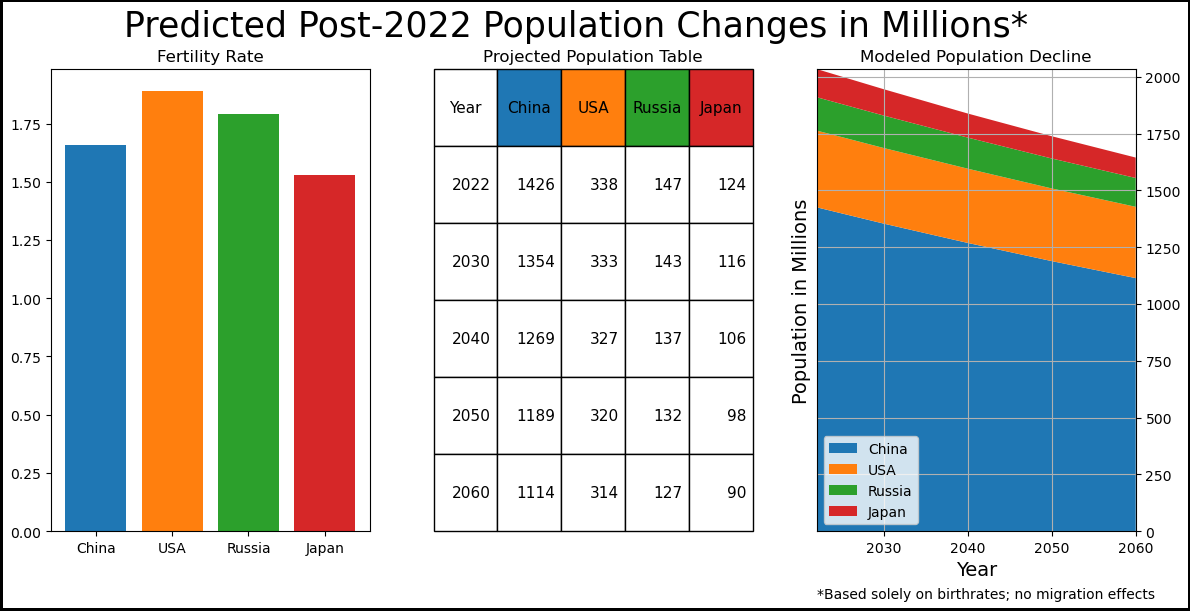

In [5]:
# Build a multi-panel figure with 3 plots in a single row:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Predicted Post-2022 Population Changes in Millions*', 
             fontsize=25)

# Create a Fertility Rate bar chart:
ax1.bar(TFR.keys(), 
        TFR.values(), 
        color=['tab:blue', 'tab:orange', 
               'tab:green', 'tab:red'])
ax1.set_title('Fertility Rate')

# Create a Population table:
bbox = [0, 0, 1, 1]
ax2.axis('off')
ax2.set_title('Projected Population Table')
mpl_table = ax2.table(cellText=df.values, 
                      bbox=bbox, 
                      colLabels=df.columns, 
                      colColours=['white', 'tab:blue', 'tab:orange', 
                                  'tab:green', 'tab:red'])
mpl_table.auto_set_font_size(True)
mpl_table.set_fontsize(12)

# Create a stack plot of Population Decline:
ax3.stackplot(df['Year'], 
              [df['China'], df['USA'], 
               df['Russia'], df['Japan']])
ax3.set_title('Modeled Population Decline')
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Population in Millions', fontsize=14)
ax3.yaxis.tick_right()
ax3.grid()
ax3.legend(labels=df.columns[1:5], loc='lower left')
ax3.text(2022, -295, '*Based solely on birthrates; no migration effects')
ax3.margins(0, 0)  # Set margins to avoid whitespace in the graph.

# Add a border to the montage:
fig.patch.set_linewidth(3)
fig.patch.set_edgecolor('k')

plt.show()